# Forecasting

In this assignment, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

Learning Objectives:

- Decompose time series into autocorrelation, seasonality, trend, and noise. 
- Explain the effects of exponential smoothing models and differentiate them from other models.
- Apply and evaluate the results of an autoregressive model. 
- Apply and evaluate the results of a moving average model. 
- Apply and evaluate the results of an autoregressive integrated moving average model.
- Apply and evaluate the results of ARIMA model for forecasting (time series prediction).


In [1]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

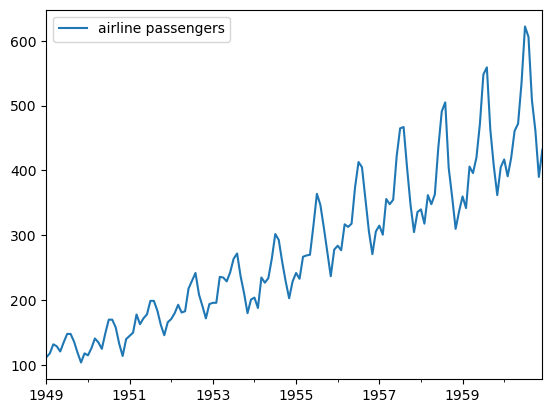

In [3]:
df = pd.read_csv('./airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   airline passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.describe()

,airline passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Question 1.1: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

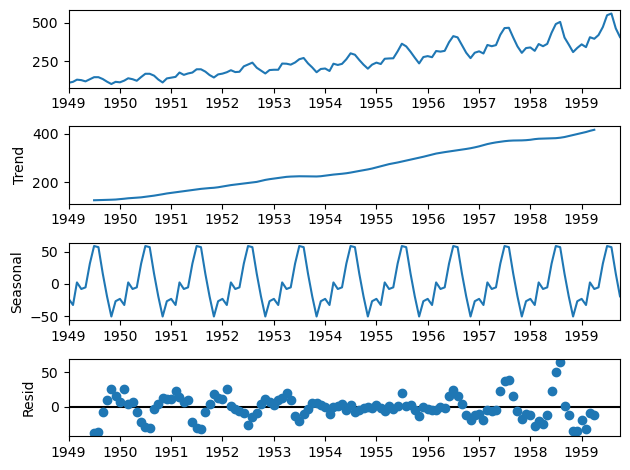

In [6]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
result.plot()
pyplot.show()

In [7]:
# result.seasonal
# len(test) #14
# len(df) #144
# len(train) #130
test

,airline passengers
1959-11-01,362
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606


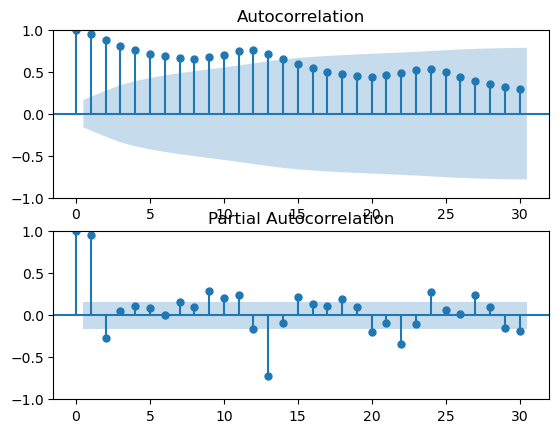

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(df, ax=pyplot.gca(), lags=30)
pyplot.subplot(212)
plot_pacf(df, ax=pyplot.gca(), lags=30)
pyplot.show()

The ACF plot tells us that data is non-stationary. For autocorrelation models, the number of non zero partial autocorrelations in the PACF plot with significant spikes tells us the order p of AR model which is about or greater than 3 here. It's harder to find q for MA models from ACF since there are no sharp cutoffs in the plot. Like with hyperparameter tuning, grid search or random search might also yield optimized p,q values.

Question 1.2: Using [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

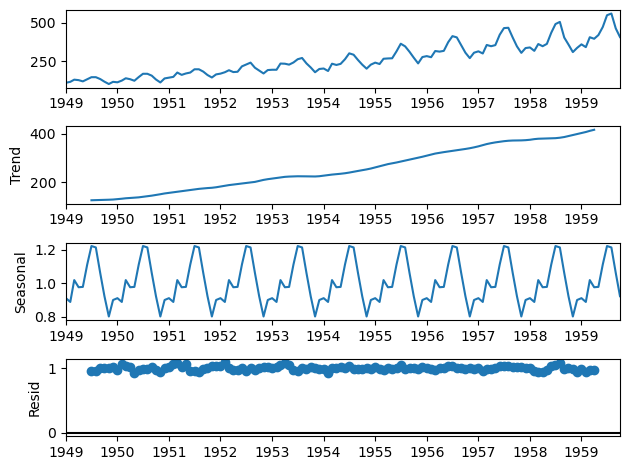

In [9]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train, model='multiplicative', filt=None, period=None, two_sided=True, extrapolate_trend=0)
result.plot()
pyplot.show()
# The seasonal decomposition makes more sense with people flying more during the holiday season. The trend component also makes sense, there's a linear increase in airline passengers through the years (maybe because air prices started being more affordable and/or because airplanes were becoming more trustworthy for travellers)

----------

Question 2.1: Apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_1 = SimpleExpSmoothing(train).fit()
pred_1 = model_1.predict(start=test.index[0], end=test.index[-1])
rmse_1 = sqrt(mean_squared_error(test, pred_1))
print("rmse:" + str(rmse_1))
mae_1 = mean_absolute_error(test, pred_1)
print("mae:" + str(mae_1))

rmse:94.8348183095322
mae:67.35714249951499


<AxesSubplot:>

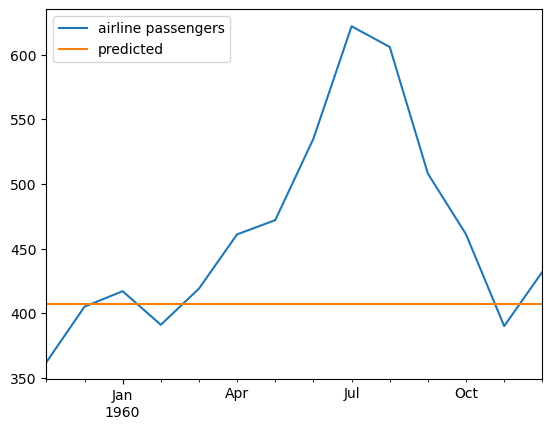

In [11]:
import matplotlib.pyplot as plt

plot_1 = test.plot()
plot_1 = pred_1.plot(label='predicted')
leg = plt.legend(loc='upper left')
plot_1

In [12]:
for sl in np.arange(0.0, 1.1, 0.2):
    model = SimpleExpSmoothing(train).fit(smoothing_level=sl)
    pred = model.predict(start=test.index[0], end=test.index[-1])
    print("smoothing level: ", sl)
    rmse = sqrt(mean_squared_error(test, pred))
    if rmse < rmse_1:
        rmse_1 = rmse
    print("rmse:" + str(rmse))
    mae = mean_absolute_error(test, pred)
    if mae < mae_1:
        mae_1 = mae
    print("mae:" + str(mae))

smoothing level:  0.0
rmse:216.31005184494583
mae:202.29780219780224
smoothing level:  0.2
rmse:77.9305029862993
mae:60.642857142857146
smoothing level:  0.4
rmse:76.80673704622787
mae:60.642857142857146
smoothing level:  0.6000000000000001
rmse:79.54045779320737
mae:60.642857142857146
smoothing level:  0.8
rmse:86.92637222764058
mae:62.09825789699543
smoothing level:  1.0
rmse:94.83481880165563
mae:67.35714285714286


Smoothing level of 0.4 helps reduce the scores but simple exponential smoothing doesn't take into account trend and seasonality.

----------

Question 2.2: Apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_2 = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit()
pred_2 = model_2.predict(start=test.index[0], end=test.index[-1])
rmse_2 = sqrt(mean_squared_error(test, pred_2))
print("rmse:" + str(rmse_2))
mae_2 = mean_absolute_error(test, pred_2)
print("mae:" + str(mae_2))

rmse:15.821888378620887
mae:11.546602080058781


<AxesSubplot:>

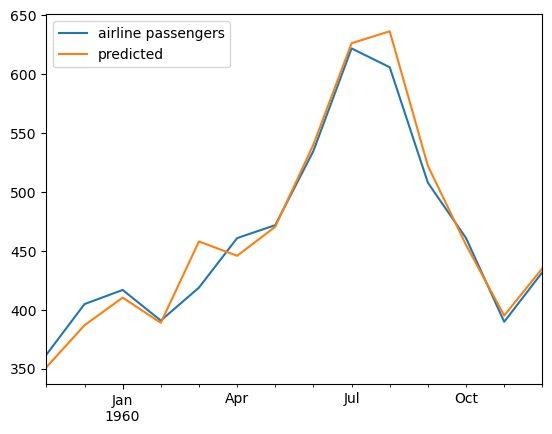

In [14]:
plot_2 = test.plot()
plot_2 = pred_2.plot(label='predicted')
leg = plt.legend(loc='upper left')
plot_2

In [15]:
for sl in np.arange(0.0, 0.1, 0.02):
    model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_trend=sl, smoothing_seasonal=sl+0.01)
    pred = model.predict(start=test.index[0], end=test.index[-1])
    print("smoothing trend: ", sl, " smoothing seasonal: ", sl+0.01)
    rmse = sqrt(mean_squared_error(test, pred))
    if rmse < rmse_2:
        rmse_2 = rmse
    print("rmse:" + str(rmse))
    mae = mean_absolute_error(test, pred)
    if mae < mae_2:
        mae_2 = mae
    print("mae:" + str(mae))

smoothing trend:  0.0  smoothing seasonal:  0.01
rmse:53.47611451905216
mae:46.06810289046938
smoothing trend:  0.02  smoothing seasonal:  0.03
rmse:14.942320904633771
mae:10.184365143040711
smoothing trend:  0.04  smoothing seasonal:  0.05
rmse:14.929348782891159
mae:10.154093596434134
smoothing trend:  0.06  smoothing seasonal:  0.06999999999999999
rmse:14.916830419151806
mae:10.084008010874644
smoothing trend:  0.08  smoothing seasonal:  0.09
rmse:15.03280820209764
mae:9.95279713382709


Trend is multiplicative as seen by the pattern from graph 1. Smoothing trend of 0.06 and smoothing seasonal of 0.07 gives the better scores.

-----

Question 3.1: Apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [16]:
# AR example
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from random import random

lags = ar_select_order(train, 25)

model_3 = AutoReg(train, lags.ar_lags).fit()
pred_3 = model_3.predict(start=test.index[0], end=test.index[-1])
rmse_3 = sqrt(mean_squared_error(test, pred_3))
print("rmse:" + str(rmse_3))
mae_3 = mean_absolute_error(test, pred_3)
print("mae:" + str(mae_3))
# lags.ar_lags

rmse:18.118532638455324
mae:16.824372101219524


Choosing seasonal as true increase the scores and so does changing trend to 'ct' and 't'. The best scores is got by keeping most parameters to default except using ar_select_order() to automatically select lags. The ar_select_order function uses BIC by default and also uses defaults of seasonal false and trend 'c', the same as defaults in AutoReg.

<AxesSubplot:>

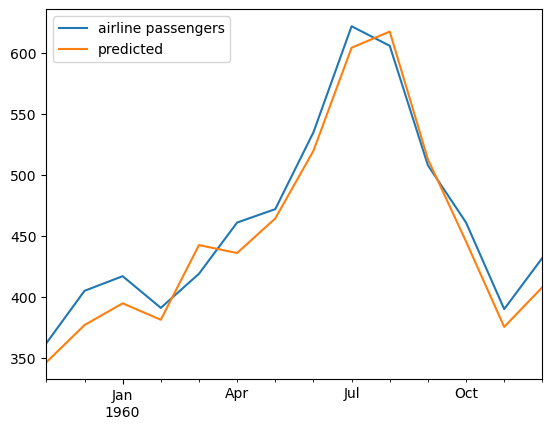

In [17]:
plot_3 = test.plot()
plot_3 = pred_3.plot(label='predicted')
leg = plt.legend(loc='upper left')
plot_3

In [18]:
for cov in ['HC0', 'HC1', 'HC2', 'HC3', 'nonrobust', 'HAC']:
    if cov != 'HAC':
        model = AutoReg(train, lags.ar_lags).fit(cov_type=cov)
    else:
        model = AutoReg(train, lags.ar_lags).fit(cov_type=cov, cov_kwds={'maxlags': 15})
    pred = model.predict(start=test.index[0], end=test.index[-1])
    print("covariance estimator: ", cov)
    rmse = sqrt(mean_squared_error(test, pred))
    if rmse < rmse_3:
        rmse_3 = rmse
    print("rmse:" + str(rmse))
    mae = mean_absolute_error(test, pred)
    if mae < mae_3:
        mae_3 = mae
    print("mae:" + str(mae))

covariance estimator:  HC0
rmse:18.118532638455324
mae:16.824372101219524
covariance estimator:  HC1
rmse:18.118532638455324
mae:16.824372101219524
covariance estimator:  HC2
rmse:18.118532638455324
mae:16.824372101219524
covariance estimator:  HC3
rmse:18.118532638455324
mae:16.824372101219524
covariance estimator:  nonrobust
rmse:18.118532638455324
mae:16.824372101219524
covariance estimator:  HAC
rmse:18.118532638455324
mae:16.824372101219524


----------

Question 3.2: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [19]:
# Simple MA example
model_4 = df.rolling(12).mean()
pred_4 = model_4.tail(14)
rmse_4 = sqrt(mean_squared_error(test, pred_4))
print("rmse:" + str(rmse_4))
mae_4 = mean_absolute_error(test, pred_4)
print("mae:" + str(mae_4))

rmse:71.76897113832669
mae:55.24404761904763


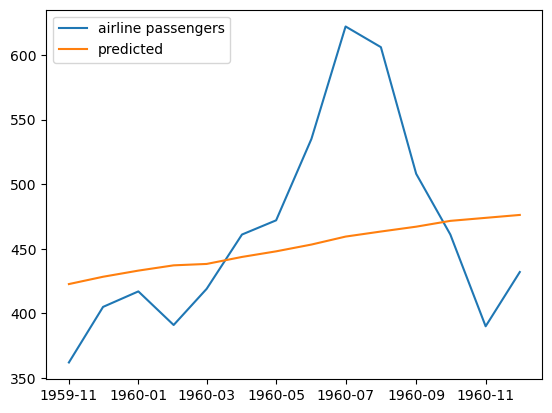

In [20]:
plt.plot(test, label='airline passengers')
plt.plot(pred_4, label='predicted')
leg = plt.legend(loc='upper left')
plt.show()

----------

Questio 4.1: Apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [21]:
# log_train = np.log(train)
# diff_log_train = log_train - log_train.shift()
# diff_log_train.dropna(inplace=True)

In [22]:
# ARMA example
from statsmodels.tsa.arima.model import ARIMA

model_5 = ARIMA(train, seasonal_order=(2, 0, 2, 12), enforce_stationarity=True).fit()
pred_5 = model_5.predict(start=test.index[0], end=test.index[-1])
rmse_5 = sqrt(mean_squared_error(test, pred_5))
print("rmse:" + str(rmse_5))
mae_5 = mean_absolute_error(test, pred_5)
print("mae:" + str(mae_5))
# model_5.summary()

rmse:27.780332580431978
mae:25.85063110381315


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


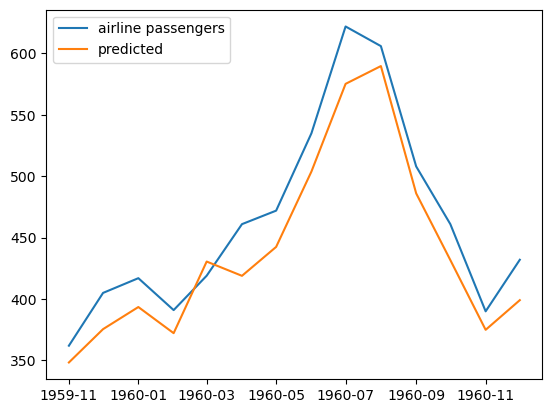

In [23]:
plt.plot(test, label='airline passengers')
plt.plot(pred_5, label='predicted')
leg = plt.legend(loc='upper left')
plt.show()

----------

Question 4.2: Apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [24]:
# ARIMA example
model_6 = ARIMA(train, seasonal_order=(2, 1, 2, 12), enforce_stationarity=True).fit()
pred_6 = model_6.predict(start=test.index[0], end=test.index[-1])
rmse_6 = sqrt(mean_squared_error(test, pred_6))
print("rmse:" + str(rmse_6))
mae_6 = mean_absolute_error(test, pred_6)
print("mae:" + str(mae_6))

rmse:33.626224056968795
mae:31.388726230133194


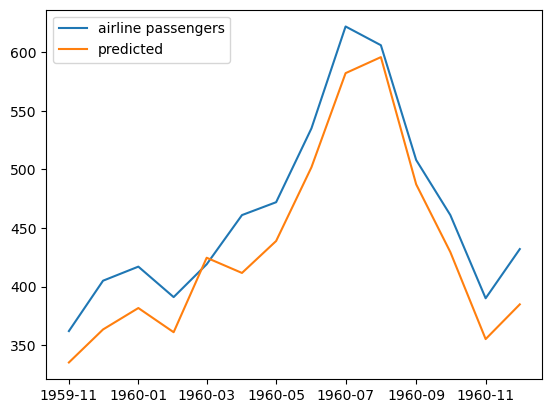

In [25]:
plt.plot(test, label='airline passengers')
plt.plot(pred_6, label='predicted')
leg = plt.legend(loc='upper left')
plt.show()

In [26]:
for method in ['statespace', 'innovations_mle']:
    model = ARIMA(train, seasonal_order=(2, 1, 2, 12), enforce_stationarity=True).fit(method=method)
    pred = model.predict(start=test.index[0], end=test.index[-1])
    print("rmse:" + str(sqrt(mean_squared_error(test, pred))))
    print("mae:" + str(mean_absolute_error(test, pred)))

rmse:33.626224056968795
mae:31.388726230133194
rmse:22.788732565113268
mae:21.218399371413053


In [27]:
for trend in ['n', 't']:
    model = ARIMA(train, seasonal_order=(2, 1, 2, 12), enforce_stationarity=True, trend=trend).fit(method='innovations_mle')
    pred = model.predict(start=test.index[0], end=test.index[-1])
    rmse = sqrt(mean_squared_error(test, pred))
    if rmse < rmse_6:
        rmse_6 = rmse
    print("rmse:" + str(rmse))
    mae = mean_absolute_error(test, pred)
    if mae < mae_6:
        mae_6 = mae
    print("mae:" + str(mae))

rmse:22.788732565113268
mae:21.218399371413053
rmse:31.675886606175098
mae:29.822491545369065


Question 5: After running through various time series models, summarize your findings. 

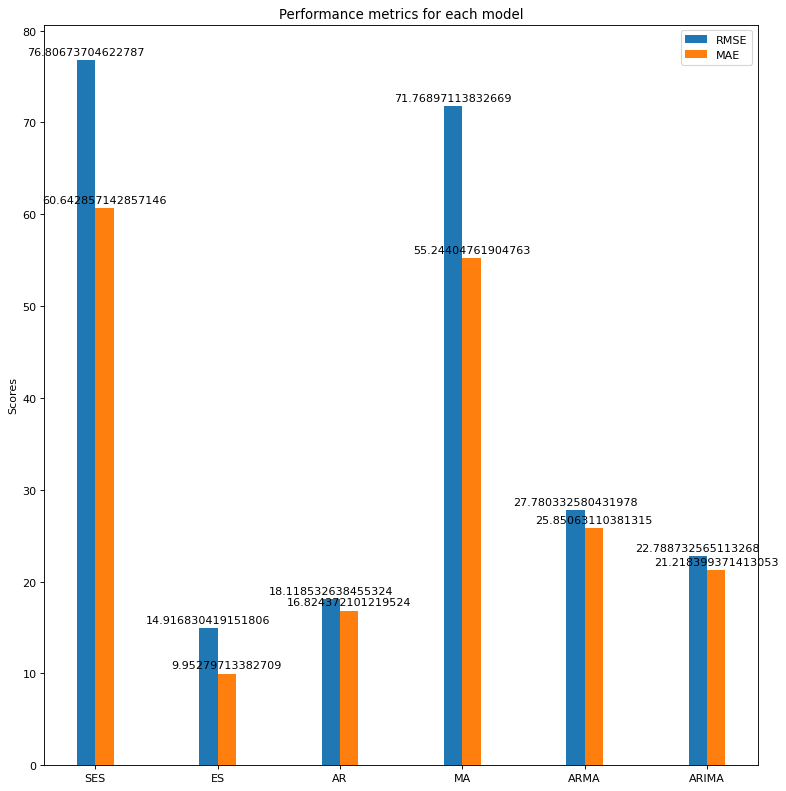

In [28]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 80

models = ['SES', 'ES', 'AR', 'MA', 'ARMA', 'ARIMA']
rmses = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6]
maes = [mae_1, mae_2, mae_3, mae_4, mae_5, mae_6]

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmses, width, label='RMSE')
rects2 = ax.bar(x + width/2, maes, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance metrics for each model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Summarizing my findings: Exponential smoothing performs the best followed by AR and ARIMA models. Simple ES might not work here as trend seems to be seasonal and model might be weighing previous observations lesser which shouldn't be the case (last January shouldn't be weighed less than last May if current observation is January). Also, simple ES is better suited for data with no clear trend or seasonal patterns. ES seems to be working here because of a linear trend. AR also performs better because it uses linear combination of past values. Factoring moving averages reduces model performance which makes sense since weighted sum of differences does not largely effect the time series.

Question 6. Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.

Incoming experience: No incoming experience apart from previous assignments Steps taken: This week's lesson was about time series analysis. Implemented most techniques on the data set to get a deeper understanding of the concepts Obstacles: This week's obstacle was understanding ACF, PACF, getting an intuition for it and understanding what Statsmodels libraries can do Link to real world: Helped me understand how time series predictions are made,  which use cases would fall under time series analysis and which models to use for each scenario Steps missing (with just this week's learning): Might be useful to implement and compare Holt's seasonal exponential smoothing and SARIMA